In [1]:
import networkx as nx
from networkx.algorithms import community
from igraph import *
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import random
from random import randint
import community as community_louvain
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from queue import Queue
plt.rcParams.update({'figure.max_open_warning': 50})

In [2]:
G = nx.read_edgelist('../Q7_data/socialmedia.graph.txt',create_using=nx.Graph(), nodetype=int) 

# a. Calculate and plot the clustering coefficient and degree distribution of the network.


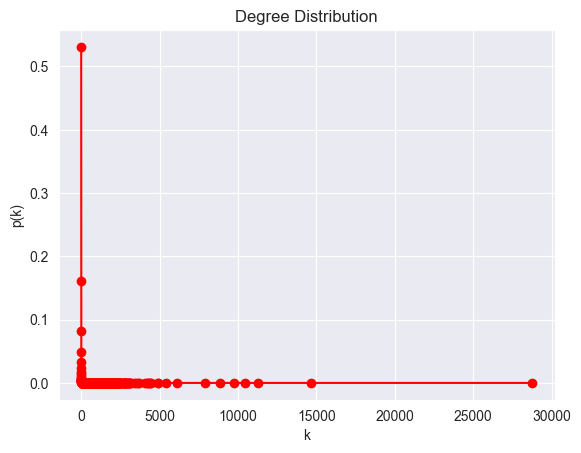

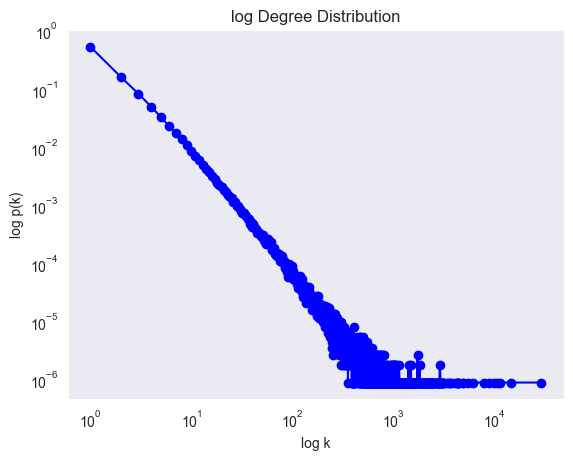

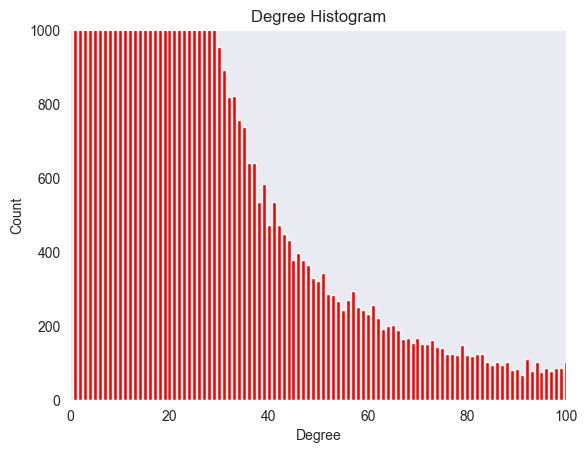

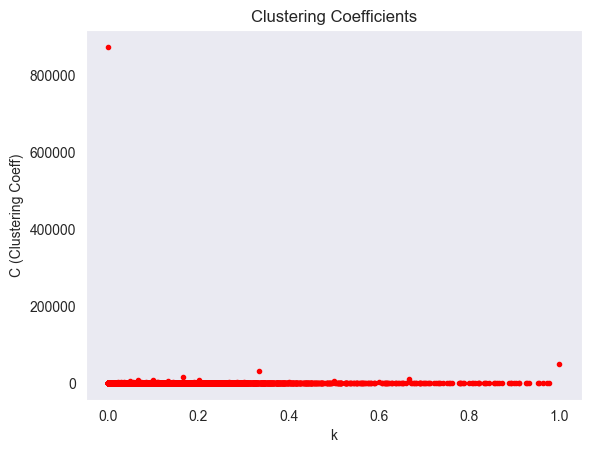

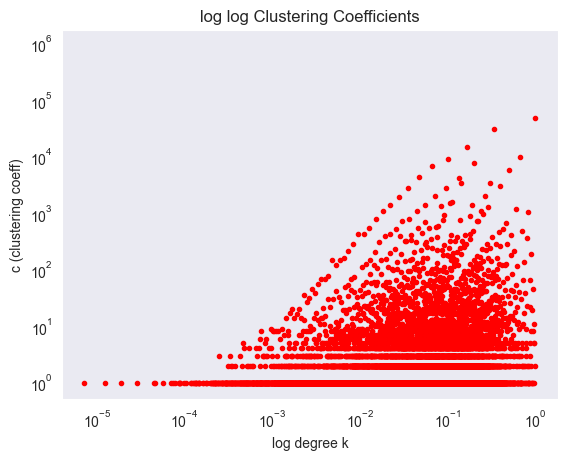

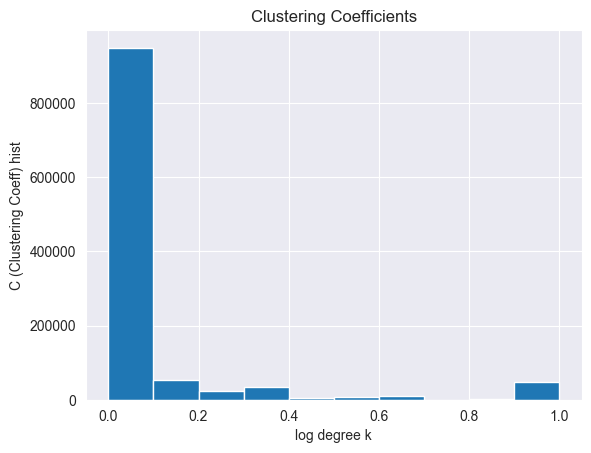

In [15]:
# Get the degree of each node in graph G
degrees = G.degree()
degrees = dict(degrees)
values = sorted(set(degrees.values()))
# Calculate the number of occurrences for each degree value and store it
histo = [list(degrees.values()).count(x) for x in values]
P_k = [x / G.order() for x in histo]

plt.figure()
plt.plot(values, P_k, "ro-")
plt.xlabel("k")
plt.ylabel("p(k)")
plt.title("Degree Distribution")
plt.show()

plt.figure()
plt.grid(False)
plt.loglog(values, P_k, "bo-")
plt.xlabel("log k")
plt.ylabel("log p(k)")
plt.title("log Degree Distribution")
plt.show()
 
#Plot of the histogram degree distribution
plt.figure()
degrees = [G.degree(n) for n in G.nodes()]
# Create an empty dictionary to store the frequency of degrees
counts = dict()
for i in degrees:
    counts[i] = counts.get(i, 0) + 1
axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([0,1000])
plt.grid(False)
plt.bar(list(counts.keys()), counts.values(), color='r')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()
    
    
# Get the clustering coefficient of each node in graph G
clust_coefficients = nx.clustering(G)  #built-in function to estimate clustering coeff  
clust_coefficients = dict(clust_coefficients)
values1= sorted(set(clust_coefficients.values()))
histo1 = [list(clust_coefficients.values()).count(x) for x in values1]

# Plot
plt.figure()
plt.grid(False)
plt.plot(values1,histo1, "r.")
plt.xlabel("k")
plt.ylabel("C (Clustering Coeff)")
plt.title("Clustering Coefficients")
plt.show()


plt.figure()
plt.grid(False)
plt.loglog(values1,histo1, "r.")
plt.xlabel("log degree k")
plt.ylabel("c (clustering coeff)")
plt.title("log log Clustering Coefficients")
plt.show()
    
plt.figure()
degrees1 = [nx.clustering(G,n) for n in G.nodes()]
plt.hist(degrees1)
plt.xlabel("log degree k")
plt.ylabel("C (Clustering Coeff) hist")
plt.title("Clustering Coefficients")
plt.show()

# b. Identify the most influential nodes in a network

In [3]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Sort nodes by degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x:x[1], reverse=True)

# Print top 5 nodes with highest degree centrality
print("Top 5 nodes with highest degree centrality:")
for node, centrality in sorted_degree_centrality[:5]:
    print("Node: ", node, " Centrality: ", centrality)

Top 5 nodes with highest degree centrality:
Node:  1072  Centrality:  0.025336398537654344
Node:  363  Centrality:  0.012900821137573806
Node:  35661  Centrality:  0.009940179171707541
Node:  106  Centrality:  0.009217641549085418
Node:  482709  Centrality:  0.008601722282972167


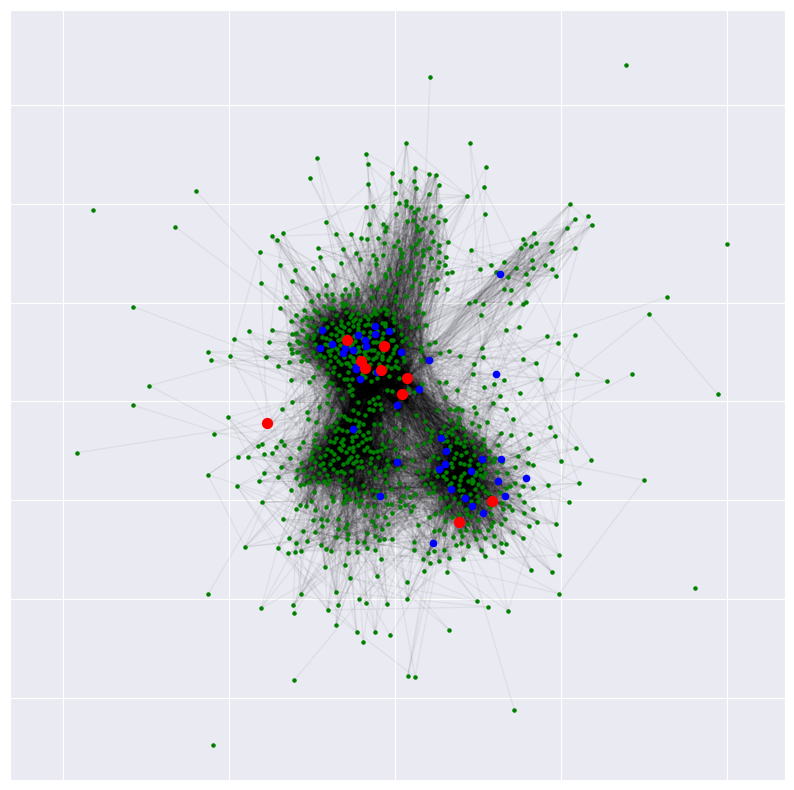

In [11]:
top_1000_nodes = sorted_degree_centrality[:1000]
top_10_nodes = sorted_degree_centrality[:10]

G1 = G.subgraph([node for node, centrality in top_1000_nodes])

# Plot
plt.figure(figsize=(10,10))

# Use spring_layout
pos = nx.spring_layout(G1, k=0.2)

# Draw nodes
nx.draw_networkx_nodes(G1, pos, nodelist=[node for node, centrality in top_1000_nodes[50:]], node_color='g', node_size=5)
nx.draw_networkx_nodes(G1, pos, nodelist=[node for node, centrality in top_1000_nodes[10:50]], node_color='b', node_size=20)
nx.draw_networkx_nodes(G1, pos, nodelist=[node for node, centrality in top_1000_nodes[:10]], node_color='r', node_size=50)
# Draw edges
nx.draw_networkx_edges(G1, pos, alpha=0.05)

plt.show()

# c. Identify Isolated Nodes in the Network

In [90]:
# # Find isolated nodes
# isolated_nodes = list(nx.isolates(G))
# # Print isolated nodes
# print("Isolated nodes: ", isolated_nodes)

g = Graph.Read_Edgelist('../Q7_data/socialmedia.graph.txt', directed=False)

# Find all orphaned nodes
isolated_nodes = g.vs.select(_degree = 0)

# Print the number of isolated nodes
print('the number of isolated nodes', len(isolated_nodes))

the number of isolated nodes 22938


# d. Recognize Connected Components in the Network

In [24]:
# Find connected components
connected_components = [len(c_components) for c_components in sorted(nx.connected_components(G), key = len, reverse  = True)]

# Print count of connected components
print("connected components: %s" % connected_components)

connected components: [1134890]


# e. Compute Average Shortest Path Length of the Network

In [3]:
num_samples = 50000  #Sampling frequency
aspl = []
for i in range(1):
    total_length = 0
    # Sample from random node pairs and calculate the shortest path length
    for _ in range(num_samples):
        u, v  = random.sample(G.nodes(), 2)
        total_length += nx.shortest_path_length(G, u, v)
    
    approx_avg_shortest_path_length = total_length / num_samples
    aspl.append(approx_avg_shortest_path_length)

# Calculate average shortest path length   
avg_shortest_path_length = sum(aspl) / len(aspl)
# Calculate the variance for each sampling
variance = np.var(aspl)

print('Variance:', variance)
print("The average shortest path length of the network is:", avg_shortest_path_length) 

C:\Users\Lee\AppData\Local\Temp\ipykernel_25424\3786583944.py:7: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  u, v  = random.sample(G.nodes(), 2)


Variance: 0.0
The average shortest path length of the network is: 5.2809


# f. Calculate the Diameter of the Network

In [84]:
from networkx.algorithms import approximation

diameter = approximation.diameter(G)
print("The approximate diameter of the graph is:", diameter)

The approximate diameter of the graph is: 24


# g. Detect Community Structures in the Network

In [165]:
import leidenalg

# Convert to igraph
g = ig.Graph.from_networkx(G)

# Using the Leiden algorithm to find the optimal partition
partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)

# Print community structure
with open("../Q7_data/communities.txt", "w") as f:
    for i, community in enumerate(partition):
        f.write(f"Community {i}: {community}\n")

In [172]:
print('The number of communities', len(partition))

The number of communities 4829


In [176]:
communities = list(partition)
community_sizes = [len(sub_list) for sub_list in communities]

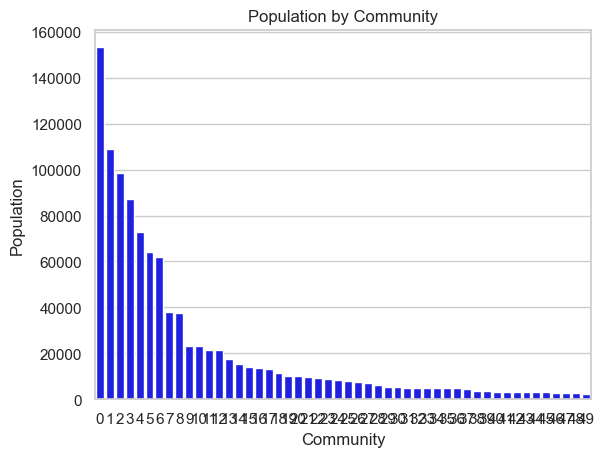

In [184]:
sns.barplot(x=range(len(community_sizes[:50])), y=community_sizes[:50], color='blue')
plt.title("Population by Community")
plt.xlabel("Community")
plt.ylabel("Population")

plt.show()

In [166]:
# Select some nodes for visualization
degree = g.degree()
nodes_to_show = sorted(range(len(degree)), key=lambda x: -degree[x])[:2000]

# Create a new graph that only includes these nodes
g2 = g.subgraph(nodes_to_show)

# Find the partition of this new image
partition2 = leidenalg.find_partition(g2, leidenalg.ModularityVertexPartition)

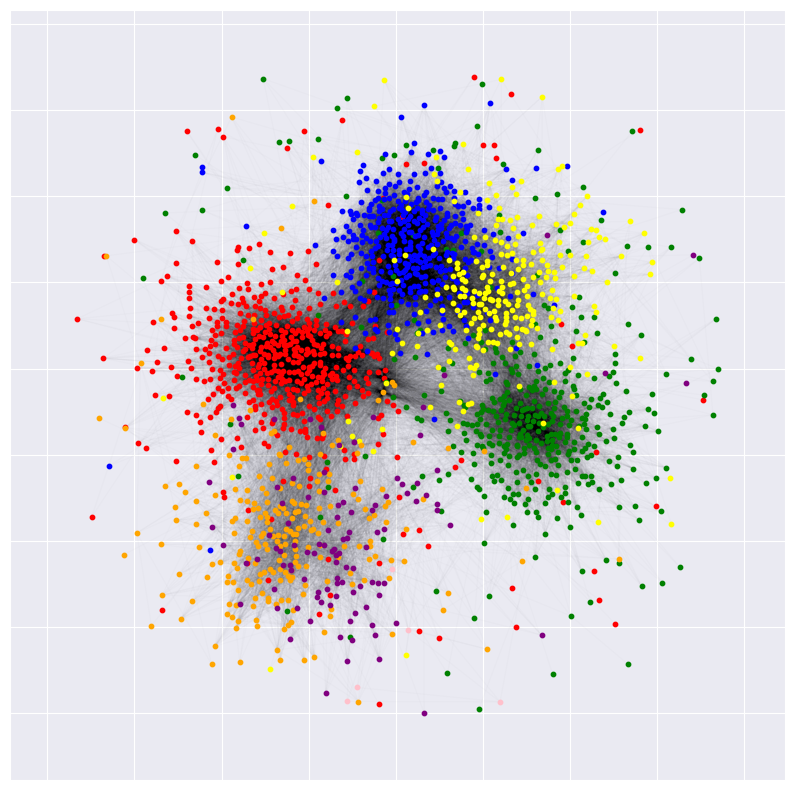

In [170]:
# Create an empty networkx graph object
GG = nx.Graph()
GG.add_edges_from(g2.get_edgelist())

# Set the color of nodes
color = ["red", "green", "blue", "yellow", "orange", "purple", "pink", "cyan", "magenta", "lime", "teal", "brown", "navy", "olive", "maroon", "silver"]



# Plot
plt.figure(figsize=(10,10))

# Use spring_layout
pos = nx.spring_layout(GG, k=0.3)

# Draw nodes
for i in range(len(list(partition2))):

    try:
        nx.draw_networkx_nodes(GG, pos, nodelist=partition2[i], node_color=color[i], node_size=10)
    except:
        pass
# Draw edges
nx.draw_networkx_edges(GG, pos, alpha=0.01)

plt.show()